In [ ]:
#Force google colab to switch to high ram mode. Run it only once. 
a = []
while(1):
    a.append('1')
#Also change runtime type to enable GPU from menu.

In [1]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import cv2;
import matplotlib.pyplot as plt
import numpy as np;
from random import shuffle;
import cv2;
from random import shuffle;
from tqdm import tqdm;
import tensorflow;
from tensorflow.keras import layers;
from tensorflow.keras import Model;
from tensorflow.keras.optimizers import SGD;
from tensorflow.keras.callbacks import TensorBoard;
IMAGE_SIZE = 75;

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
train_Data_File = drive.CreateFile({'id': '1JY6KgFazqhfBWyFOiBApyPJLL7v2sC4E'});
test_Data_File = drive.CreateFile({'id': '1Tziz-iSKEOEruEqNd6di0fEdR_O7o6zC'});

In [ ]:
#This block takes 6-10 minutes to load the training data.
train_Data_File.GetContentFile('Cat_Dog_Train_Data.npy');
train_Data = np.load('Cat_Dog_Train_Data.npy', allow_pickle=True)

In [ ]:
train_Data.shape
#No of training images, First columns is of images and second is of labels

(24500, 2)

In [ ]:
test_Data_File.GetContentFile('Cat_Dog_Test_Data.npy');
test_Data = np.load('Cat_Dog_Test_Data.npy', allow_pickle= True)

In [ ]:
test_Data.shape
#No of test images, First columns is of images and second is of labels

(500, 2)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1 0]')

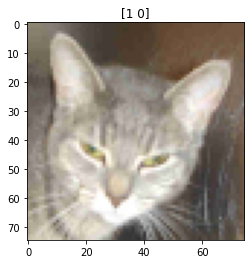

In [ ]:
image_Index = 15;
plt.imshow(train_Data[image_Index][0])
plt.title(train_Data[image_Index][1])

In [ ]:
train_Data[image_Index][0].shape

(75, 75, 3)

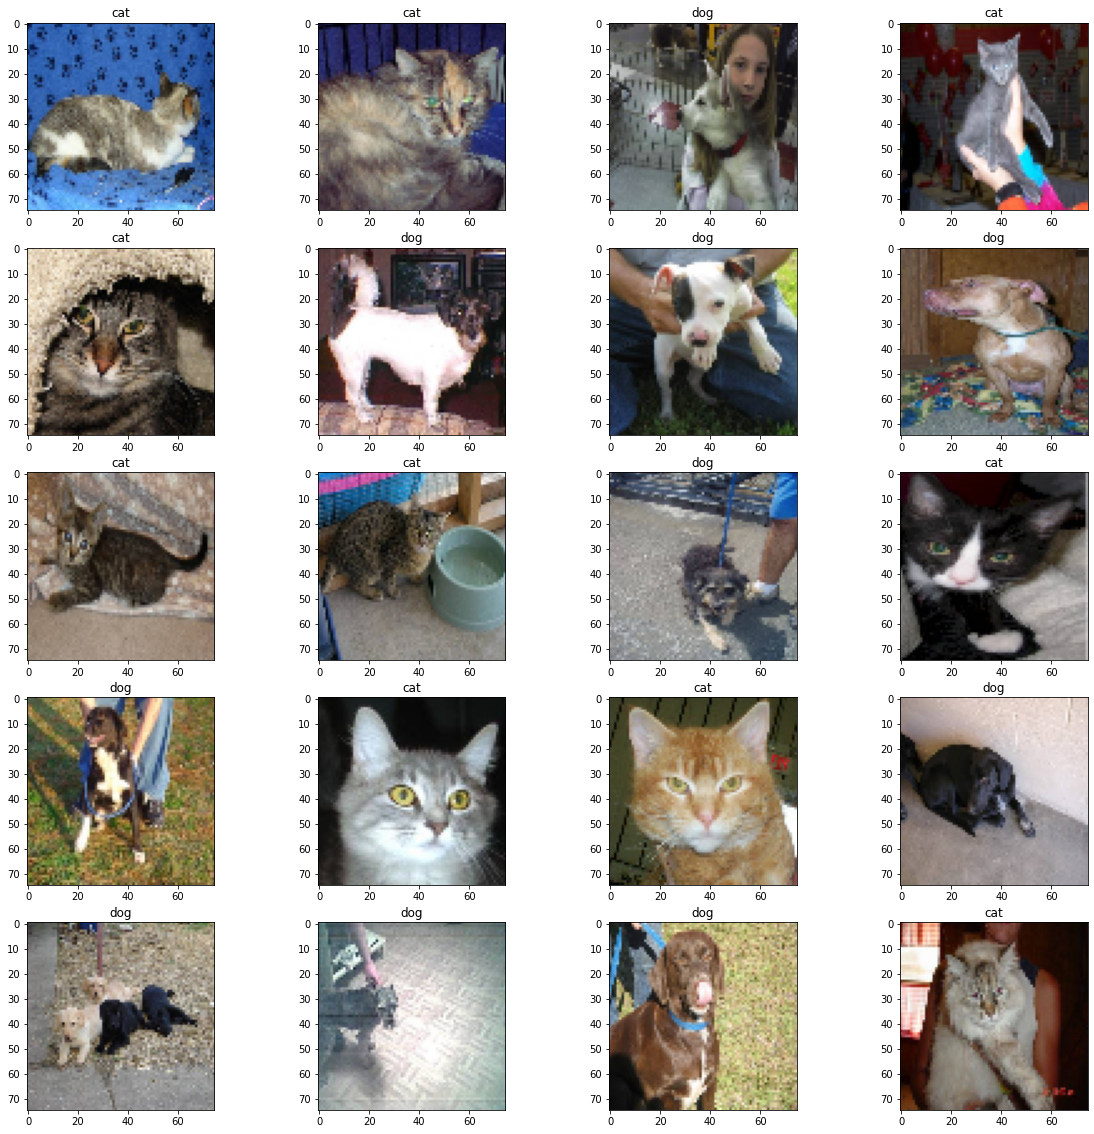

In [ ]:
#Show some training images with labels
count = 0;
Num_of_Images = 20;
plt.figure(figsize=(20,20))
for i in np.random.randint(1000, size = Num_of_Images):
  count = count+1;
  plt.subplot(Num_of_Images/4,4, count);
  plt.imshow(train_Data[i][0])
  P = train_Data[i][1];
  if(P[0]>P[1]):
      plt.title('cat')
  else:
      plt.title('dog');

In [ ]:
# Our input feature map is 75x75x3: 75x75 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 128 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a two nodes and softmax activation
output = layers.Dense(2, activation='softmax')(x)

# Create model:
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 73, 73, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['acc']);

In [ ]:
# Prepare the data for the training by separating X and Y vectors.
X_train = np.array([i[0] for i in tqdm(train_Data)]);
Y_train = np.array([i[1] for i in train_Data]);

X_test = np.array([i[0] for i in tqdm(test_Data)]);
Y_test = np.array([i[1] for i in test_Data]);

100%|██████████| 500/500 [00:00<00:00, 901613.07it/s]


In [ ]:
model.fit(X_train,Y_train, batch_size =64, epochs = 10,verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
383/383 [==============================] - 4s 11ms/step - loss: 0.6396 - acc: 0.6789 - val_loss: 0.6243 - val_acc: 0.6460
Epoch 2/10
383/383 [==============================] - 4s 10ms/step - loss: 0.4690 - acc: 0.7765 - val_loss: 0.5323 - val_acc: 0.7440
Epoch 3/10
383/383 [==============================] - 4s 10ms/step - loss: 0.4000 - acc: 0.8198 - val_loss: 0.5549 - val_acc: 0.7560
Epoch 4/10
383/383 [==============================] - 4s 10ms/step - loss: 0.3504 - acc: 0.8450 - val_loss: 0.5182 - val_acc: 0.7620
Epoch 5/10
383/383 [==============================] - 4s 10ms/step - loss: 0.3052 - acc: 0.8683 - val_loss: 0.5585 - val_acc: 0.7640
Epoch 6/10
383/383 [==============================] - 4s 10ms/step - loss: 0.2582 - acc: 0.8906 - val_loss: 0.5126 - val_acc: 0.7720
Epoch 7/10
383/383 [==============================] - 4s 10ms/step - loss: 0.2346 - acc: 0.9002 - val_loss: 0.5183 - val_acc: 0.7780
Epoch 8/10
383/383 [==============================] - 4s 10ms/step - 

In [ ]:
import matplotlib.pyplot as plt

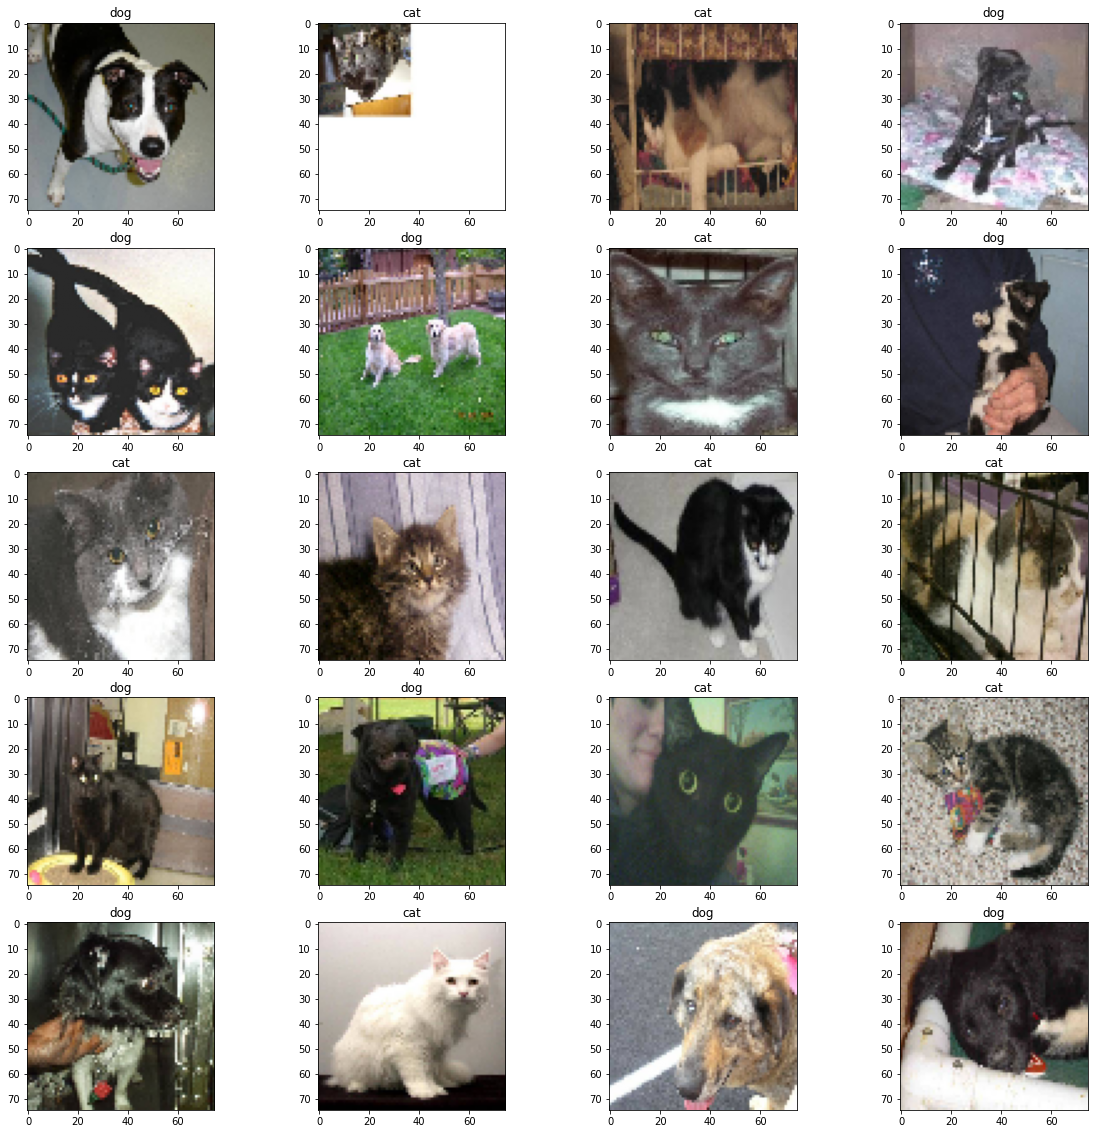

In [ ]:
#Show some random test images with their predictions as title.
count = 0;
Num_of_Images = 20;
plt.figure(figsize=(20,20))
for i in np.random.randint(500, size = Num_of_Images):
  count = count+1;
  plt.subplot(Num_of_Images/4,4, count);
  plt.imshow(X_test[i].reshape(IMAGE_SIZE, IMAGE_SIZE,3))
  P = model.predict(X_test[i].reshape(1,IMAGE_SIZE, IMAGE_SIZE,3))
  P = np.array(P);
  if(P[0,0]>P[0,1]):
      plt.title('cat')
  else:
      plt.title('dog')